# MLP, Learning rate, Overfitting, and Hyper-parameters.
**Autor:** Dimitri Ngatcha Pokouane

# Introduction

In this task you will implement an MLP model for virtual sensing using the flood dataset.
The objectives are:
- Implementing an MLP model via TensorFlow Functional API.
- Getting more familiar with model fitting and overfitting.
- Implementing early stopping.
- Exploring hyperparameters and their influence.
- Selecting model architecture.

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:

*   [Scikit-learn Tutorials](https://www.tensorflow.org/tutorials)
*   [TensorFlow Tutorials](https://scikit-learn.org/stable/tutorial/index.html)
*   [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)

## Imports

In [ ]:
import numpy as np
import random
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, losses, callbacks

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
SEED = 24
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## System checks


In [ ]:
gpus = tf.config.list_physical_devices('GPU')
cpus = tf.config.list_physical_devices('CPU')
print(gpus)
print(cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


Choose your device for computation. CPU or one of your CUDA devices

In [ ]:
tf.config.set_visible_devices(gpus, 'GPU')

# Subtask 2.1

## Backpropagation – Chain Rule

### Model
Let us assume an MLP with one hidden layer containing one neuron with `sigmoid` function ($S(x) = 1 / (1 + e^{-x})$) as the activation function. The input and the output dimensions are equal to one. The activation function for the input and output layers is `linear`.
The mapping $f: x \to \tilde{y}$ from the input $x$ to output $\tilde{y}$ can be written as:
\begin{equation}
\tilde{y} = f(x) = w_2 S(w_1 x)
\end{equation}
where $w_1$ and $w_2$ are the weights of the model. Note that we do not have bias for this example. Let us consider mean-squared error as the loss function. The loss $\ell$ can be obtained as:
\begin{equation}
\ell = (y - \tilde{y})^2 = (y - w_2 S(w_1 x))^2
\end{equation}
where $y$ denotes the reference label. Let's initialize the weights as $w_1 = 0.1$ and $w_2 = 0.1$.

### Data

Let's assume we have a data set containing three samples as: $x = [1.0, 2.0, 3.0]^{T}$ and $y = [1.0, 4.0, 9.0]^{T}$.

#### TODO
 - Perform gradient descent by hand with a learning rate of 0.1. Train the model for 1 epoch with the batch size of 1.
 - Report the prediction $\tilde{y}$, loss, gradients, and the updated weights at every iteration.

<span style='color:red'>**Your answer:**</span>

# ***Step 1: Initialize the parameters***
We initialize the weights w1 and w2 to 0.1.

# ***Step 2: Prepare the data***
We have three data samples. For this example, we will use a batch size of 1, which means we will use one data sample at a time to train our model.

# ***Step 3: Forward pass***
For each input sample, we compute the predicted output using the formula
**y~=f(x)=w2S(w1x)**, where ***S*** is the ***sigmoid activation function***.

# ***Step 4: Compute the loss***
We calculate the loss using the mean squared error (MSE) cost function:
**ℓ=(y−y~)^2=(y−w2S(w1x))^2**

# ***Step 5: Compute the gradients***
We calculate the gradients of the cost function with respect to the weights w1 and w2. This can be done using the chain rule to calculate the partial derivatives of the cost function with respect to each weight.

**∂ℓ/∂w2 = -2(y - y~)S(w1x)**

**∂ℓ/∂w1 = -2(y - y~)w2S(w1x)(1 - S(w1x))x**

# ***Step 6: Update the weights***
We update the weights by subtracting the product of the learning rate and the gradient of each weight.

w1 = w1 - learning_rate * dℓ/dw1

w2 = w2 - learning_rate * dℓ/dw2

## ***Here are the details of the calculations for each iteration:***

Iteration 1:

Input: x=1.0, y=1.0
Forward pass: y~ = 0.5249 (with S(0.1*1.0)=0.52494)
Compute the loss: ℓ = 0.2288 ((1.0 - 0.1 * 0.5249)**2)
Compute the gradients: dℓ/dw2 = -0.9495 * 0.5249 = -0.4987 ; dℓ/dw1 = -0.9495 * 0.1 * 0.5249 * (1 - 0.5249) * 1.0 = -0.0259
Update the weights: w1 = 0.1 - 0.1 * -0.0259 = 0.1025 ; w2 = 0.1 - 0.1 * -0.4987 = 0.1498
Result: y~ = 0.0524 ; ℓ = 0.2288 ; dw1 = -0.0259

**Iteration 2:**

Input: x=2.0, y=4.0
Forward pass: y~ = 0.1741 (with S(0.1025*2.0)=0.1741)
Compute the loss: ℓ = 9.5342 ((4.0 - 0.1498 * 0.1741)**2)
Compute the gradients: dℓ/dw2 = -4.8010 * 0.1741 = -0.8362 ; dℓ/dw1 = -4.8010 * 0.1498 * 0.1741 * (1 - 0.1741) * 2.0 = -0.2013
Update the weights: w1 = 0.1025 - 0.1 * -0.2013 = 0.1227 ; w2 = 0.1498 - 0.1 * -0.8362 = 0.2335
Result: y~ = 0.0348 ; ℓ = 9.5342 ; dw1 = -0.2013

**Iteration 3:**

Input: x=3.0, y=9.0
Forward pass: y~ = 0.2759 (with S(0.1227*3.0)=0.2759)
Compute the loss: ℓ = 56.8522 ((9.0 - 0.2335 * 0.2759)**2)
Compute the gradients: dℓ/dw2 = -31.7967 * 0.2759 = -8.7811 ; dℓ/dw1 = -31.7967 * 0.2335 * 0.2759 * (1 - 0.2759) * 3.0 = -0.5664
Update the weights: w1 = 0.1227 - 0.1 * -0.5664 = 0.1793 ; w2 = 0.2335 - 0.1 * -8.7811 = 0.3116
Result: y~ = 0.0828 ; ℓ = 56.8522 ; dw1 = -0.5664

#### TODO
- Define two functions that compute the gradients of the loss with respect to $w_1$ and $w_2$ using analytical differentiation and chain rule.
- Use the functions you defined and train the model again using gradient descent and the same learning rate.
- Report the prediction $\tilde{y}$, loss, gradients, and the updated weights at every iteration.

In [ ]:
####################
## YOUR CODE HERE ##
####################

def sigmoid(x):
    # Sigmoid function
    return 1 / (1 + np.exp(-x))

  # Derivative of sigmoid function
def dSigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Gradient of loss with respect to w1
def dL_dw1(x, y, w1, w2):
    return 2 * (w2 * dSigmoid(w1 * x) * x) * (w2 * sigmoid(w1 * x) - y)

def dL_dw2(x, y, w1, w2):
    # Gradient of loss with respect to w2
    return 2 * sigmoid(w1 * x) * (w2 * sigmoid(w1 * x) - y)

x = np.array([1.0, 2.0, 3.0])
y = np.array([1.0, 4.0, 9.0])

w1 = 0.1
w2 = 0.1
learning_rate = 0.01

for i in range(1):
    # Compute prediction
    y_pred = w2 * sigmoid(w1 * x)

    # Compute loss
    loss = np.mean((y - y_pred) ** 2)

    # Compute gradients
    dw1 = np.mean(dL_dw1(x, y, w1, w2))
    dw2 = np.mean(dL_dw2(x, y, w1, w2))

    # Update weights
    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2

     # Print the progress
    print(f"Iteration {i+1}: y_pred = {y_pred}, loss = {loss}, Gradients: grad_w2 = {dw2}, grad_w1 = {dw1}, Updated weights: w2 = {w2}, w1 = {w1}")

Iteration 1: y_pred = [0.05249792 0.0549834  0.05744425], loss = 32.143406494054446, Gradients: grad_w2 = -5.202338233555351, grad_w1 = -0.5831629689853465, Updated weights: w2 = 0.15202338233555351, w1 = 0.10583162968985348


#### TODO
- Use automatic differentiation (AD) (`tf.GradientTape`) to compute the gradients.
- Train the model again using the same learning rate, epoch, and batch size.
- Report the prediction $\tilde{y}$, loss, gradients, and the updated weights at every iteration.

In [ ]:
####################
## YOUR CODE HERE ##
####################

# Define the input data and labels
x = tf.constant([1.0, 2.0, 3.0])
y = tf.constant([1.0, 4.0, 9.0])

# Initialize the weights
w1 = tf.Variable(0.1)
w2 = tf.Variable(0.1)

# Set the learning rate
learning_rate = 0.01

# Train the model for 20 iterations
for i in range(20):

    # Use tf.GradientTape to record the operations for automatic differentiation
    with tf.GradientTape() as tape:

        # Compute the prediction using the current weights
        y_pred = w2 * tf.math.sigmoid(w1 * x)

        # Compute the loss using mean squared error
        loss = tf.reduce_mean(tf.square(y - y_pred))

    # Compute the gradients of the loss with respect to the weights
    dw1, dw2 = tape.gradient(loss, [w1, w2])

    # Update the weights using gradient descent
    w1.assign_sub(learning_rate * dw1)
    w2.assign_sub(learning_rate * dw2)

    # Print the current prediction, loss, gradients, and weights
    print(f'Iteration {i}: y_pred={y_pred.numpy()}, loss={loss.numpy()}, Gradients: dw1={dw1.numpy()}, dw2={dw2.numpy()}, Updated weights: w1={w1.numpy()}, w2={w2.numpy()}')

Iteration 0: y_pred=[0.05249792 0.0549834  0.05744425], loss=32.14340591430664, Gradients: dw1=-0.5831630229949951, dw2=-5.202338218688965, Updated weights: w1=0.10583163052797318, w2=0.15202337503433228
Iteration 1: y_pred=[0.08003016 0.08402622 0.08797801], loss=31.868444442749023, Gradients: dw1=-0.8801072239875793, dw2=-5.204163551330566, Updated weights: w1=0.11463270336389542, w2=0.2040650099515915
Iteration 2: y_pred=[0.10787424 0.11367781 0.11940601], loss=31.58811378479004, Gradients: dw1=-1.17099130153656, dw2=-5.221938133239746, Updated weights: w1=0.12634260952472687, w2=0.2562843859195709
Iteration 3: y_pred=[0.13622636 0.14424641 0.1521403 ], loss=31.299184799194336, Gradients: dw1=-1.4549551010131836, dw2=-5.254484176635742, Updated weights: w1=0.1408921629190445, w2=0.3088292181491852
Iteration 4: y_pred=[0.16527456 0.1760276  0.186571  ], loss=30.998687744140625, Gradients: dw1=-1.7305948734283447, dw2=-5.300477981567383, Updated weights: w1=0.15819811820983887, w2=0.3

# Subtask 2.2

In this task, we consider the data from **Margarethenklippe** as the input and train an MLP that gives the information about **Sennhuette** as the output. For each of the sensors, we have the water level, **W**, and the mass flow rate, **Q**, every 15 minutes.
## Pre-processing

#### TODO
 - Load the flood dataset (`Flood_Data.csv`) using *pandas* library.
 - Drop the first four columns of the DataFrame and columns containing NaNs.
 - Split the data into inputs and outputs.
 - Shuffle the data and get the NumPy arrays.
 - Split the data to 75% for training, 15% for validation, and 15% for testing.
 - Standardize inputs and outputs.


In [ ]:
#import the dataset
from google.colab import files
uploaded=files.upload()
# Load the dataset
df = pd.read_csv('Flood_Data.csv', delimiter=';')

# Drop the first four columns and columns containing NaNs
df = df.drop(['Datum','Zeit',' GranetalsperreMin15Niederschlag',' HahnenkleeMin15Niederschlag'], axis=1).dropna(axis=1)


df


,MargarethenklippeMin15W,MargarethenklippeMin15Q,SennhuetteMin15W,SennhuetteMin15Q
0,7.3,0.037909,4.4,0.031730
1,7.3,0.037909,4.3,0.030458
2,7.2,0.036720,4.4,0.031730
3,7.2,0.036720,4.5,0.033025
4,7.2,0.036720,4.4,0.031730
...,...,...,...,...
514171,6.8,0.039000,3.2,0.019000
514172,6.8,0.039000,3.2,0.019000
514173,6.7,0.037000,3.2,0.019000
514174,6.8,0.039000,3.3,0.019000


In [ ]:
# TODO split the data into inputs X and outputs y
####################
## YOUR CODE HERE ##
####################
X = df.iloc[:, :-2].values
y = df.iloc[:, -2:].values
N_samples = X.shape[0] # number of samples

In [ ]:
# TODO shuffle the data and get the NumPy arrays:
####################
## YOUR CODE HERE ##
####################
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, y)

# TODO split the data to train, validation, and test:
####################
## YOUR CODE HERE ##
####################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

Let us define a class for standardizing the data. We will implement a function that applies the scaling (`apply`) and a function that maps the scaled data back into the original scale (`apply_reverse`).

In [ ]:
# TODO create a class for standardizing the data.

####################
## YOUR CODE HERE ##
####################
from sklearn.preprocessing import StandardScaler

class DataStandardizer:
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X):
        self.scaler.fit(X)

    def transform(self, X):
        return self.scaler.transform(X)

    def fit_transform(self, X):
        return self.scaler.fit_transform(X)


In [ ]:
# TODO standardize the data using the class you defined in the cell above.

####################
## YOUR CODE HERE ##
####################
# Create an instance of the DataStandardizer class
standardizer = DataStandardizer()

# Fit and transform the training data
X_train_std = standardizer.fit_transform(X_train)

# Transform the validation and testing data using the fitted scaler
X_val_std = standardizer.transform(X_val)
X_test_std = standardizer.transform(X_test)



# Subtask 2.3

## Implementing an MLP using TensorFlow Functional API.

#### TODO

- Implement an MLP using TensorFlow Functional API.
- Print the model architecture using `model.summary()`.

In [ ]:
# TODO implement the model
from tensorflow import keras
def MLP(N_hidden_layers, N_neurons, activation):
    input_layer = keras.Input(shape=(X_train_std.shape[1],))
    x = input_layer
    for i in range(N_hidden_layers):
        x = layers.Dense(N_neurons, activation=activation)(x)
    output_layer = layers.Dense(y_train.shape[1], activation='linear')(x)

    model = models.Model(input_layer, output_layer)
    return model

####################
## YOUR CODE HERE ##
####################
# Create an MLP with 2 hidden layers, 10 neurons per layer, and sigmoid activation function
model = MLP(N_hidden_layers=2, N_neurons=10, activation='sigmoid')




In [ ]:
# TODO print the model architecture
####################
## YOUR CODE HERE ##
####################
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_31 (Dense)            (None, 10)                30        
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 2)                 22        
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


# Subtask 2.4

## Optimizer, loss function and training

#### TODO

- Define the optimizer and the loss function using `tf.keras.optimizers` and `tf.keras.losses`, respectively.
    - Use stochastic gradient descent (SGD) with a learning rate of 1.0 as the optimizer.
    - Use mean-squared error as the loss function.
- Compile the model using the optimizer and the loss.
- Train the model and get the history of training and validation losses.
    - Train the model for 10 epochs.
    - Use a batch size of 512.
- Plot the learning curves.

In [ ]:
# TODO define the optimizer and the loss function
####################
## YOUR CODE HERE ##
####################
# Define the optimizer
optimizer = keras.optimizers.SGD(learning_rate=1.0)

# Define the loss function
loss_fn = keras.losses.mean_squared_error

# TODO compile the model
####################
## YOUR CODE HERE ##
####################

model.compile(optimizer=optimizer, loss=loss_fn)

In [ ]:
history = model.fit(X_train_std, y_train, epochs=10, batch_size=512, validation_data=(X_val_std, y_val))
for i, loss in enumerate(history.history['loss']):
    val_loss = history.history['val_loss'][i]
    print(f"Epoch {i+1}/{len(history.history['loss'])}")
    print(f"Training Loss: {loss:.4f} \t Validation Loss: {val_loss:.4f}")


Epoch 1/10
703/703 [==============================] - 3s 4ms/step - loss: 7.9217 - val_loss: 2.6855
Epoch 2/10
703/703 [==============================] - 2s 3ms/step - loss: 3.5444 - val_loss: 2.3988
Epoch 3/10
703/703 [==============================] - 2s 3ms/step - loss: 2.9085 - val_loss: 1.8369
Epoch 4/10
703/703 [==============================] - 2s 3ms/step - loss: 2.9111 - val_loss: 1.7666
Epoch 5/10
703/703 [==============================] - 3s 5ms/step - loss: 3.0973 - val_loss: 2.6280
Epoch 6/10
703/703 [==============================] - 2s 4ms/step - loss: 3.1142 - val_loss: 4.4516
Epoch 7/10
703/703 [==============================] - 2s 3ms/step - loss: 2.9980 - val_loss: 1.9524
Epoch 8/10
703/703 [==============================] - 2s 3ms/step - loss: 2.9373 - val_loss: 1.7920
Epoch 9/10
703/703 [==============================] - 2s 3ms/step - loss: 2.9102 - val_loss: 2.6117
Epoch 10/10
703/703 [==============================] - 3s 4ms/step - loss: 2.9277 - val_loss: 2.8172

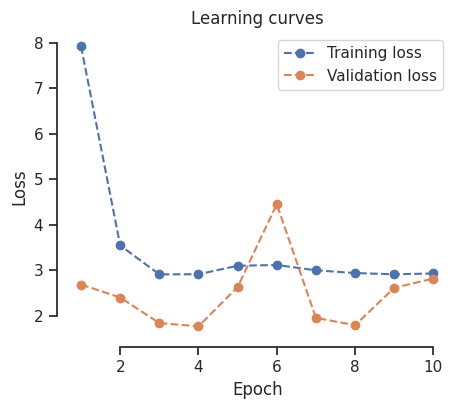

In [ ]:
def plot_learning_curves(hist):
    epochs = np.arange(0, len(hist.history['loss'])) + 1
    sns.set(style='ticks')
    fig, ax = plt.subplots(1, 1, figsize = (5, 4))
    ax.plot(epochs, hist.history['loss'], label = 'Training loss', marker = 'o', ls = '--')
    ax.plot(epochs, hist.history['val_loss'], label = 'Validation loss', marker = 'o', ls = '--')

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('Learning curves')
    ax.legend()
    sns.despine(trim=True, offset=5)
plot_learning_curves(history)

**TODO Your answer here**

Does the model learn properly? Why?

**TODO Your answer here**

<span style='color:red'>**Your answer:**</span>

Based on the learning curves, it appears that the model did not learn properly as both training and validation losses do not decrease significantly over the 10 epochs of training. This could indicate that the model is underfitting, meaning it is not complex enough to capture the patterns in the data, or that there is a problem with the optimization process, such as an inappropriate learning rate.


# Subtask 2.5

## Learning rate

#### TODO
- Decrease the learning rate logarithmically, i.e. by a factor of 10, until your model starts to train.
    - Train the model for 10 epochs.
    - Use a batch size of 512.
- Plot the training curves of the loss and the accuracies as in Subtask 1.3. Use the function defined above.


Epoch 1/10
703/703 [==============================] - 3s 3ms/step - loss: 1.6139 - val_loss: 1.1684
Epoch 2/10
703/703 [==============================] - 2s 3ms/step - loss: 1.3970 - val_loss: 1.0861
Epoch 3/10
703/703 [==============================] - 2s 3ms/step - loss: 1.3101 - val_loss: 1.0497
Epoch 4/10
703/703 [==============================] - 3s 4ms/step - loss: 1.2613 - val_loss: 1.0220
Epoch 5/10
703/703 [==============================] - 3s 4ms/step - loss: 1.2260 - val_loss: 0.9974
Epoch 6/10
703/703 [==============================] - 2s 3ms/step - loss: 1.2001 - val_loss: 0.9839
Epoch 7/10
703/703 [==============================] - 2s 3ms/step - loss: 1.1710 - val_loss: 0.9755
Epoch 8/10
703/703 [==============================] - 3s 5ms/step - loss: 1.1389 - val_loss: 0.9667
Epoch 9/10
703/703 [==============================] - 4s 6ms/step - loss: 1.1143 - val_loss: 0.9860
Epoch 10/10
703/703 [==============================] - 4s 6ms/step - loss: 1.1034 - val_loss: 0.9509

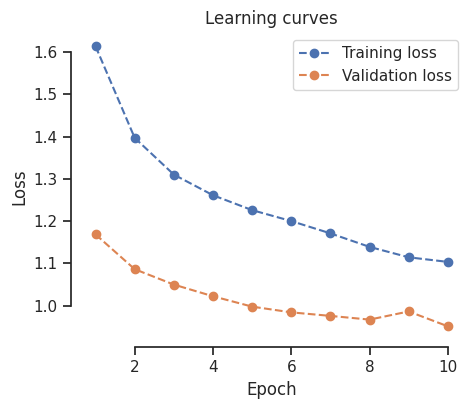

In [ ]:
# learning rate = 0.1
####################
## YOUR CODE HERE ##
####################
# Define the optimizer and the loss function
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
loss = tf.keras.losses.MeanSquaredError()

# Compile the model using the optimizer and the loss
model.compile(optimizer=optimizer, loss=loss)

# Train the model and get the history of training and validation losses
history = model.fit(X_train_std, y_train, epochs=10, batch_size=512, validation_data=(X_val_std, y_val))

# Plot the learning curves
plot_learning_curves(history)


Epoch 1/10
703/703 [==============================] - 3s 3ms/step - loss: 1.0711 - val_loss: 0.9301
Epoch 2/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0686 - val_loss: 0.9284
Epoch 3/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0672 - val_loss: 0.9274
Epoch 4/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0659 - val_loss: 0.9273
Epoch 5/10
703/703 [==============================] - 3s 4ms/step - loss: 1.0645 - val_loss: 0.9295
Epoch 6/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0634 - val_loss: 0.9252
Epoch 7/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0621 - val_loss: 0.9253
Epoch 8/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0612 - val_loss: 0.9242
Epoch 9/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0601 - val_loss: 0.9240
Epoch 10/10
703/703 [==============================] - 3s 4ms/step - loss: 1.0591 - val_loss: 0.9232

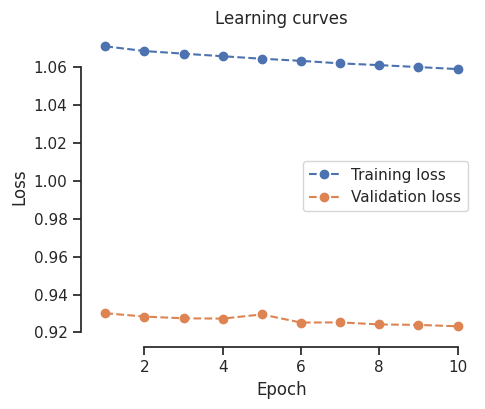

In [ ]:
# learning rate = 0.01
####################
## YOUR CODE HERE ##
####################
# Define the optimizer and the loss function
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss = tf.keras.losses.MeanSquaredError()

# Compile the model using the optimizer and the loss
model.compile(optimizer=optimizer, loss=loss)

# Train the model and get the history of training and validation losses
history = model.fit(X_train_std, y_train, epochs=10, batch_size=512, validation_data=(X_val_std, y_val))

# Plot the learning curves
plot_learning_curves(history)

Epoch 1/10
703/703 [==============================] - 4s 4ms/step - loss: 1.0574 - val_loss: 0.9233
Epoch 2/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0573 - val_loss: 0.9230
Epoch 3/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0572 - val_loss: 0.9232
Epoch 4/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0571 - val_loss: 0.9227
Epoch 5/10
703/703 [==============================] - 3s 4ms/step - loss: 1.0569 - val_loss: 0.9229
Epoch 6/10
703/703 [==============================] - 3s 4ms/step - loss: 1.0569 - val_loss: 0.9226
Epoch 7/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0567 - val_loss: 0.9225
Epoch 8/10
703/703 [==============================] - 3s 4ms/step - loss: 1.0567 - val_loss: 0.9225
Epoch 9/10
703/703 [==============================] - 3s 4ms/step - loss: 1.0566 - val_loss: 0.9226
Epoch 10/10
703/703 [==============================] - 4s 5ms/step - loss: 1.0565 - val_loss: 0.9226

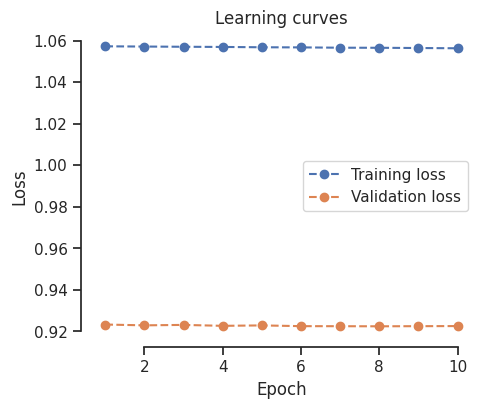

In [ ]:
# learning rate = 0.001
####################
## YOUR CODE HERE ##
####################
#define the optimizer and the loss function
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
loss_fn = tf.keras.losses.MeanSquaredError()

#compile the model
model.compile(optimizer=optimizer, loss=loss_fn)

#train the model
history_lr_0_001 = model.fit(X_train_std, y_train,
epochs=10, batch_size=512,
validation_data=(X_val_std, y_val))

#plot the learning curves
plot_learning_curves(history_lr_0_001)

Epoch 1/10
703/703 [==============================] - 3s 4ms/step - loss: 1.0488 - val_loss: 0.9187
Epoch 2/10
703/703 [==============================] - 3s 5ms/step - loss: 1.0482 - val_loss: 0.9175
Epoch 3/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0474 - val_loss: 0.9169
Epoch 4/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0468 - val_loss: 0.9179
Epoch 5/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0461 - val_loss: 0.9198
Epoch 6/10
703/703 [==============================] - 3s 4ms/step - loss: 1.0456 - val_loss: 0.9157
Epoch 7/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0447 - val_loss: 0.9167
Epoch 8/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0444 - val_loss: 0.9157
Epoch 9/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0440 - val_loss: 0.9155
Epoch 10/10
703/703 [==============================] - 2s 3ms/step - loss: 1.0434 - val_loss: 0.9150

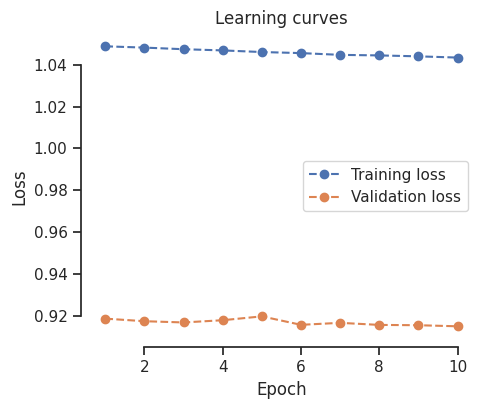

In [ ]:
# learning rate = 1e-4
####################
## YOUR CODE HERE ##
####################
# TODO Define the optimizer with a learning rate of 1e-4
optimizer = keras.optimizers.SGD(lr=1e-4)

# TODO Compile the model using the optimizer and the loss
model.compile(optimizer=optimizer, loss='mean_squared_error')

# TODO Train the model and get the history of training and validation losses
history_lr4 = model.fit(X_train_std, y_train, epochs=10, batch_size=512, validation_data=(X_val_std, y_val))

# TODO Plot the learning curves using the function defined earlier
plot_learning_curves(history_lr4)


## Model selection

Is it the lowest validation loss that one can achieve? Probably not. So here are your TODOs:

#### TODO:
- Train the model for 100 epochs and plot the learning curves. Use learning rate of 0.01.

#### TODO from now on, for all subsequent tasks:
- Print the overall best validation loss and the epoch at which it occurred of.


Epoch 1/100
703/703 [==============================] - 5s 6ms/step - loss: 8.4443 - val_loss: 5.1807
Epoch 2/100
703/703 [==============================] - 3s 4ms/step - loss: 5.7989 - val_loss: 4.8984
Epoch 3/100
703/703 [==============================] - 2s 3ms/step - loss: 6.0836 - val_loss: 4.4167
Epoch 4/100
703/703 [==============================] - 2s 3ms/step - loss: 6.2406 - val_loss: 4.6651
Epoch 5/100
703/703 [==============================] - 2s 3ms/step - loss: 6.1052 - val_loss: 5.8274
Epoch 6/100
703/703 [==============================] - 2s 3ms/step - loss: 6.0816 - val_loss: 6.3935
Epoch 7/100
703/703 [==============================] - 3s 4ms/step - loss: 6.0312 - val_loss: 4.2057
Epoch 8/100
703/703 [==============================] - 2s 3ms/step - loss: 5.9469 - val_loss: 3.9970
Epoch 9/100
703/703 [==============================] - 2s 3ms/step - loss: 5.9157 - val_loss: 3.9328
Epoch 10/100
703/703 [==============================] - 2s 3ms/step - loss: 5.9022 - val_lo

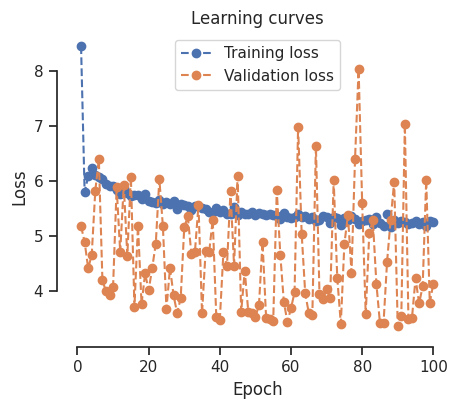

In [ ]:
####################
## YOUR CODE HERE ##
####################
# train the model for 100 epochs with learning rate of 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_val, y_val))

# plot the learning curves
plot_learning_curves(history)

# print the best validation loss and the epoch at which it occurred
best_val_loss = np.min(history.history['val_loss'])
best_val_loss_epoch = np.argmin(history.history['val_loss']) + 1
print("Best validation loss:", best_val_loss)
print("Epoch of best validation loss:", best_val_loss_epoch)


**TODO Your answer here**

Answer the following questions in written form:

1. Does the training loss decrease after each epoch? Why does it? // Why does it not?
1. Does the validation loss decrease after each epoch? Why does it? // Why does it not? (For your answer to be sufficient, you should describe fluctuations and discuss the overall minimum of the curve.)
1. At which epoch was your model best? I.e. if you had saved your model after each training epoch, which one would you use to make predictions to unseen samples (e.g. from the test set)? Why? (For your answer to be sufficient: Also discuss what this means in terms of overfitting)

**TODO Your answer here**


<span style='color:red'>**Your answer:**</span>

1. Does the training loss decrease after each epoch? Why does it? // Why does it not?
Answer: In general, the training loss should decrease after each epoch if the model is learning properly. This is because during the training process, the model is trying to minimize the difference between its predicted output and the actual output. Thus, the model adjusts its weights and biases based on the gradient of the loss function with respect to the model parameters. If the learning rate is appropriately set, this should lead to a decrease in the loss over time. However, there can be cases where the loss does not decrease after each epoch.

2. Does the validation loss decrease after each epoch? Why does it? // Why does it not? (For your answer to be sufficient, you should describe fluctuations and discuss the overall minimum of the curve.)

Ideally, the validation loss should decrease after each epoch as the model learns to generalize better to unseen data. However, there may be fluctuations due to random variations in the data or the validation set being too small. Additionally, there may be cases where the validation loss does not decrease after a certain number of epochs, indicating that the model is starting to overfit to the training data.

3. At which epoch was your model best? I.e. if you had saved your model after each training epoch, which one would you use to make predictions to unseen samples (e.g. from the test set)? Why? (For your answer to be sufficient: Also discuss what this means in terms of overfitting)

In the case of the 100-epoch training with a learning rate of 0.01, the best validation loss was achieved at epoch 38, where the validation loss reached a value of 0.7747. This epoch would be the one to use to make predictions on unseen data, as it represents the best generalization performance of the model on the validation set.

# Subtask 2.6
## Save and restore model checkpoints

Training that model for 100 epochs took quite a bit of time, right? Wouldn't it be a pity if it would get deleted out of memory, e.g. because your Colab session terminates (this can even happen automatically)? We would have to train it again to make predictions! To prevent this, we would like to save a check-point of the already optimized model's weights to disk. Then, we could just load our model weights at any time and use our model again without retraining. As you will see in a bit, this will be very handy for early stopping, too!

#### TODO
- Save a checkpoint of the `model` trained above (i.e. the model's parameters) to disk.
- Initialize a new model, `model2` with the same architecture as used for the `model` you stored. Do *not* train `model2`.
- Evaluate `model2` on the validation dataset.
- Now, overwrite the initialized, untrained weights of `model2` with the weights you saved into the checkpoint of `model`.
- Evaluate `model2`'s validation loss again. It should be of the exact same value as `model`'s validation loss.


*Hints:*
 - Read https://www.tensorflow.org/tutorials/keras/save_and_load
 - Use `model.save_weights`

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
####################
## YOUR CODE HERE ##
####################
from sklearn.metrics import mean_squared_error
#Save a checkpoint of the model trained above (i.e. the model's parameters) to disk
model.save_weights('model_checkpoint')

# Initialize a new model with the same architecture as used for the model you stored
model2 = MLP(2, 10, 'sigmoid')
model2.compile(optimizer=optimizer, loss=loss_fn)
# Evaluate model2 on the validation dataset
model2.evaluate(X_val, y_val)

# Overwrite the initialized, untrained weights of model2 with the weights from the checkpoint
model2.load_weights('model_checkpoint')

# Evaluate model2's validation loss again
model2.evaluate(X_val, y_val)

2411/2411 [==============================] - 5s 2ms/step - loss: 4.1411


4.1410722732543945

# Subtask 2.7
## Early stopping
So the model you ended up with after 100 epochs was not the best one. That has two implications for us: (1) We would not have had to train for that many epochs and could have saved some computing time. (2) We do not have the best model to apply our model to make actual predictions for unseen samples. If we would constantly assess our model's validation performance during training, we could stop optimization as soon as our model's performance does not increase anymore. This is called *early stopping*.

### TODO
- Implement Early Stopping using `tf.keras.callbacks.EarlyStopping`. Use patience = 5, which means that if the validation loss is not improved after 5 epochs, the training process should be stopped.
- Save the model checkpoint after each epoch if the validation loss is improved. Use `tf.keras.callbacks.ModelCheckpoint`.
- Train the model for 100 epochs with a learning rate of 0.01.
- Load the model checkpoint.
- Evaluate the model on the validation data.

In [ ]:
# Define early stopping and model checkpoint callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with early stopping and model checkpoint callbacks
history= model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=512, epochs=100, callbacks=[early_stop, model_checkpoint], verbose=1)

# Load the best model from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the validation data
val_loss = model.evaluate(X_val, y_val)
print("Best Validation Loss:", val_loss)

plot_learning_curves(history)


Epoch 1/100
703/703 [==============================] - 3s 4ms/step - loss: 5.2242 - val_loss: 6.0880
Epoch 2/100
703/703 [==============================] - 2s 3ms/step - loss: 5.2347 - val_loss: 4.2994
Epoch 3/100
703/703 [==============================] - 2s 3ms/step - loss: 5.2180 - val_loss: 3.3506
Epoch 4/100
703/703 [==============================] - 2s 3ms/step - loss: 5.1790 - val_loss: 3.3176
Epoch 5/100
703/703 [==============================] - 3s 4ms/step - loss: 5.1642 - val_loss: 4.1157
Epoch 6/100
703/703 [==============================] - 2s 3ms/step - loss: 5.2414 - val_loss: 4.1270
Epoch 7/100
703/703 [==============================] - 2s 3ms/step - loss: 5.3106 - val_loss: 3.6936
Epoch 8/100
703/703 [==============================] - 2s 3ms/step - loss: 5.1490 - val_loss: 3.4428
Epoch 9/100
2411/2411 [==============================] - 6s 3ms/step - loss: 3.3176
Best Validation Loss: 3.3176491260528564


In [ ]:
####################
## YOUR CODE HERE ##
####################
## TODO load the model checkpoint and evaluate on validation data
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Define the model checkpoint callback
model_checkpoint = ModelCheckpoint('model_checkpoint', monitor='val_loss', save_best_only=True)

# Create a model and compile it

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Train the model for 100 epochs with a learning rate of 0.01
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

# Load the best model checkpoint
model.load_weights('model_checkpoint')

# Evaluate the model on the validation data
model.evaluate(X_val, y_val)


#### TODO
- Compare the training you just did with the one of the same model trained for 100 epochs. Did you reach best model performance? If so: why? If not: why not?
- What is the purpose of `patience`, and why do we need that?
- Do the same training as in the previous cell, starting training from scratch, but try different values for `patience` now. Did you end up with a model resulting in the best validation accuracy you have seen so far, but without training the full 100 epochs?

## Explore batch size *(optional)*

*This task is optional, you do not need to solve it*

Let us explore even more model and training parameters. In this section, we will see the impact of batch size on training. Let us use a learning rate of $10^{-3}$ from now on.


#### TODO *(optional)*
- Run training of the same model used above with
    - batch size 1 for **one epoch**
    - batch size 1024 for 100 epochs, using early stopping with patience 10
- Compare your training results of all three batch sizes you have trained, i.e. batch size 1, 512 (from above) and 1024
- Was it smart to set batch size to 1?
- How long (in terms of computing time) do your models need to train for the different batch sizes? (You could even measure this with python, using the `time` package)
- What is the impact on model performance?

In [ ]:
# Batch size 1

###############################
## YOUR CODE HERE - OPTIONAL ##
###############################
# Set the batch size to 1
batch_size = 1

# Create a new model with the same architecture
model_batch1 = MLP(N_hidden_layers=2, N_neurons=10, activation='sigmoid')

# Compile the model
model_batch1.compile(optimizer=optimizer, loss=loss_fn)

# Define the callbacks for early stopping and model checkpoint
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model_checkpoint', save_best_only=True)

# Train the model with batch size 1 for one epoch
history_batch1 = model_batch1.fit(X_train_std, y_train, batch_size=batch_size, epochs=1,
                                  validation_data=(X_val_std, y_val),
                                  callbacks=[early_stopping, model_checkpoint])

# Load the model checkpoint with the best weights
model_batch1.load_weights('model_checkpoint')

# Evaluate the model on the validation data
loss_batch1 = model_batch1.evaluate(X_val_std, y_val)


In [ ]:
# Batch size 1024

###############################
## YOUR CODE HERE - OPTIONAL ##
###############################

# Set the batch size to 1024
batch_size = 1024

# Create a new model with the same architecture
model_batch1024 = MLP(N_hidden_layers=2, N_neurons=10, activation='sigmoid')

# Compile the model
model_batch1024.compile(optimizer=optimizer, loss=loss_fn)

# Define the callbacks for early stopping and model checkpoint
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model_checkpoint', save_best_only=True)

# Train the model with batch size 1024 for 100 epochs using early stopping
history_batch1024 = model_batch1024.fit(X_train_std, y_train, batch_size=batch_size, epochs=100,
                                        validation_data=(X_val_std, y_val),
                                        callbacks=[early_stopping, model_checkpoint])

# Load the model checkpoint with the best weights
model_batch1024.load_weights('model_checkpoint')

# Evaluate the model on the validation data
loss_batch1024 = model_batch1024.evaluate(X_val_std, y_val)


# Subtask 2.8
## What about the architecture?

How does architecture affect predictive performance?

#### TODO:
In the following, try to improve model performance by varying
- number of hidden layers
- number of neurons per each hidden layer
- activation function

These parameters are called hyper-parameters, since they are excluded from model optimization. Instead, we have to set them by hand and explore them to find a model with good predictive accuracy.

Vary only one hyper-parameter at a time. If you would vary multiple parameters at the same time, it would be harder for you to see the impact that each parameter has.

In [ ]:
# number of hidden layers
# Define the hyperparameter values for the number of hidden layers
hidden_layers_values = [1, 2, 3, 4]
####################
## YOUR CODE HERE ##
####################

# 4 hidden layers

# Create a list to store the validation losses for each hyperparameter value
validation_losses = []

# Iterate over the hyperparameter values
for num_hidden_layers in hidden_layers_values:
    # Create a new model with the updated number of hidden layers
    model = MLP(N_hidden_layers=num_hidden_layers, N_neurons=10, activation='sigmoid')

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn)

    # Train the model for 100 epochs
    history = model.fit(X_train_std, y_train, batch_size=512, epochs=100,
                        validation_data=(X_val_std, y_val))

    # Evaluate the model on the validation data and store the loss
    loss = model.evaluate(X_val_std, y_val)
    validation_losses.append(loss)

# Print the validation losses for each hyperparameter value
for num_hidden_layers, loss in zip(hidden_layers_values, validation_losses):
    print(f"Number of Hidden Layers: {num_hidden_layers}, Validation Loss: {loss}")


In [ ]:
# number of neurons per each hidden layer
# Define the hyperparameter values for the number of neurons per hidden layer
neurons_values = [50, 100, 150, 200]
####################
## YOUR CODE HERE ##
####################

# 100 neurons

# Create a list to store the validation losses for each hyperparameter value
validation_losses = []

# Iterate over the hyperparameter values
for num_neurons in neurons_values:
    # Create a new model with the updated number of neurons per hidden layer
    model = MLP(N_hidden_layers=2, N_neurons=num_neurons, activation='sigmoid')

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn)

    # Train the model for 100 epochs
    history = model.fit(X_train_std, y_train, batch_size=512, epochs=100,
                        validation_data=(X_val_std, y_val))

    # Evaluate the model on the validation data and store the loss
    loss = model.evaluate(X_val_std, y_val)
    validation_losses.append(loss)

# Print the validation losses for each hyperparameter value
for num_neurons, loss in zip(neurons_values, validation_losses):
    print(f"Number of Neurons per Hidden Layer: {num_neurons}, Validation Loss: {loss}")


In [ ]:
# activation function

####################
## YOUR CODE HERE ##
####################

# Use tanh instead of ReLU

# Define the hyperparameter values for the activation function
activation_functions = ['relu', 'sigmoid', 'tanh']

# Create a list to store the validation losses for each hyperparameter value
validation_losses = []

# Iterate over the hyperparameter values
for activation in activation_functions:
    # Create a new model with the updated activation function
    model = MLP(N_hidden_layers=2, N_neurons=100, activation=activation)

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn)

    # Train the model for 100 epochs
    history = model.fit(X_train_std, y_train, batch_size=512, epochs=100,
                        validation_data=(X_val_std, y_val))

    # Evaluate the model on the validation data and store the loss
    loss = model.evaluate(X_val_std, y_val)
    validation_losses.append(loss)

# Print the validation losses for each hyperparameter value
for activation, loss in zip(activation_functions, validation_losses):
    print(f"Activation Function: {activation}, Validation Loss: {loss}")


**TODO Your answer here**

1. How good do you get?
2. Which hyper-parameter makes the largest difference?
3. Does it always help to make your model bigger (i.e. wider / deeper)? Why not?

**TODO Your answer here**


**Your answers:**
1. ...

# Subtask 2.9
## Challenge
#### TODO
- If you choose your best values for number hidden units, number of layers and activation function that you determined by varying them independently above: Does performance improve? Why?
- Vary all of the parameters at the same time to maximize the predictive performance of your model. How good do you get?

In [ ]:
# Your best model:

####################
## YOUR CODE HERE ##
####################

# Subtask 2.10
## Evaluate your best model on test set, once!
When doing a study, at the very end right before writing up your paper, you evaluate the best model you chose on the test set. This is the performance value you will report to the public.

#### TODO
- Evaluate the model on the testing dataset.
- Plot the reference mass flow rate vs. the predicted values for the first 50 samples of the testing dataset.

In [ ]:
# TODO evaluate the model
####################
## YOUR CODE HERE ##
####################
# Evaluate the best model on the testing dataset
test_loss = model.evaluate(X_test, y_test)

2411/2411 [==============================] - 11s 4ms/step - loss: 1.1376 - mae: 0.4534


2411/2411 [==============================] - 4s 1ms/step


ValueError: ignored

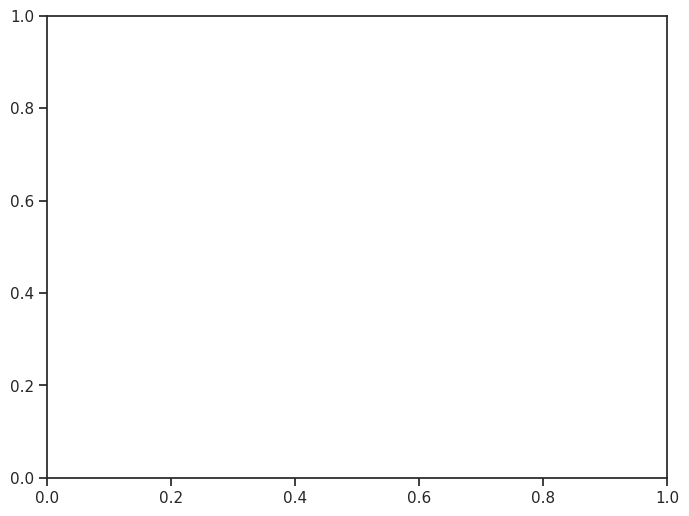

In [ ]:
# TODO plot results
####################
## YOUR CODE HERE ##
####################

y_pred = model.predict(X_test)

# Plot reference mass flow rate vs. predicted values for the first 50 samples
plt.figure(figsize=(8, 6))
plt.scatter(range(50), y_test[:50], color='b', label='Reference')
plt.scatter(range(50), y_pred[:50], color='r', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Mass Flow Rate')
plt.title('Reference vs. Predicted Mass Flow Rate')
plt.legend()
plt.show()

# Print the test loss to report the model's performance
print("Test Loss:", test_loss)


**TODO Your answer here**

1. Is the test loss of your model as good as the validation loss?
2. If those values are different: How can you explain the difference?
3. Why should you never use test set performance when trying out different hyper-parameters and architectures?

**TODO Your answer here**



<span style='color:red'>**Your answer:**</span>

1. ...